<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
%matplotlib inline
import datetime as dt
import pandas as pd
import sys
import csv
import glob
import ipywidgets #as widgets
import itertools
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import socket

#from functionsuf import *
#from map_hospitals_v2 import *
from matplotlib import *
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from matplotlib.dates import *
#style.use('ggplot')
from numpy.random import randn
#from scipy import statss
from pandas import  DataFrame, Series
import statsmodels.api as sm

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# import plotly.plotly as py
# import plotly.offline as plo
import cufflinks as cf
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)


sns.set()

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import HTML
HTML("<style>.container { width:90% !important; }</style>")

In [2]:
year = '21'
month='06'
day = '16'

In [3]:
df_ec = pd.read_excel("resultados_"+year+month+day+".xlsx", dtype=object)

In [4]:
# df_ec = df_ec.sort_values(['Name', 'Day', 'Puntos'])
# df_ec['Fase'] = 1

# df_temp = {}
# for nm in list(df_ec['Name'].unique()):
#     df_temp[nm] = df_ec[df_ec['Name']==nm]
#     df_temp[nm]['Puntos_Day'] = df_temp[nm]['Puntos'].diff().replace(np.nan, 0)
  
# df_ec = pd.concat([df_temp[nm] for nm in list(df_ec['Name'].unique())])

# df_ec = df_ec.sort_values(['Day', 'Name'])
# df_ec.to_excel("resultados_210615_fixed.xlsx", index=False)
# df_ec.head(20)

In [5]:
df_ec.sample(10)

,Name,Day,Fase,Puntos,Puntos_Day
18,Jorge,1,1,1,1
67,Nico,4,1,6,1
42,Sergio,2,1,5,4
98,Pablo,6,1,12,3
15,Avelino,1,1,1,1
53,Pablo,3,1,7,3
22,Nico,1,1,1,1
79,Martin,5,1,7,1
94,Martin,6,1,7,0
89,Urbano,5,1,9,1


In [6]:
df_ec

,Name,Day,Fase,Puntos,Puntos_Day
0,Avelino,0,1,0,0
1,Carlos,0,1,0,0
2,Eduardo,0,1,0,0
3,Jorge,0,1,0,0
4,Martin,0,1,0,0
...,...,...,...,...,...
100,Ricardo,6,1,9,1
101,Salva,6,1,11,3
102,Sergio,6,1,10,1
103,Tanya,6,1,7,3


Eduardo, Pablo
Carlos, Jorge, Massi, Salva
Avelino, Sergio
Rebeca, Ricardo, Urbano
Martin, Nico, Tanya
Miguel


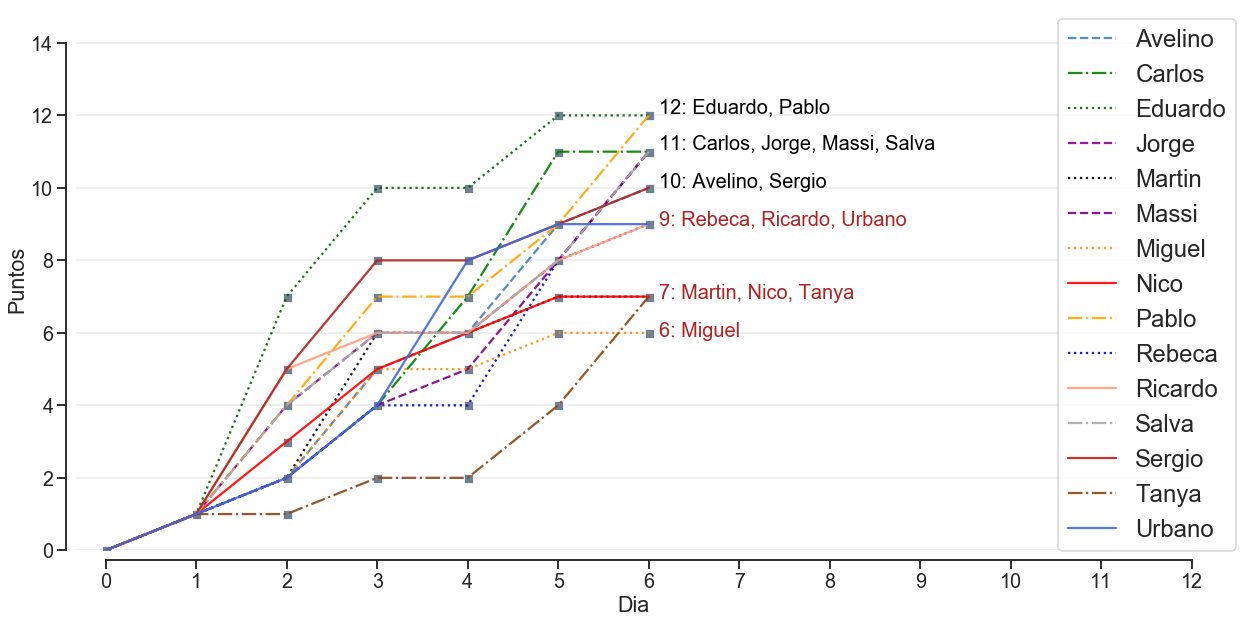

In [10]:
#expect.groupby('Month_Procedure')['BlastRate'].mean().plot()
from matplotlib import transforms as tf
from itertools import cycle, islice

sns.set(style="ticks", context="talk" , font_scale=1.2)
f, ax = plt.subplots(figsize=(20,10));

df_ec['Puntos'] = df_ec['Puntos'].astype(int)


#df_to_plot = df_ec.set_index('Day').groupby('Name')['Puntos']
df_to_plot = df_ec.pivot_table(values='Puntos', index='Day', columns='Name')
#display(df_to_plot)

# colors = ['FireBrick', 'FireBrick', 'FireBrick']
# i=0
# for name in list(df_to_plot['Name'].unique()):
#     df_to_plot[df_to_plot['Name']==name].plot(kind='line', marker='o', markersize = 10, alpha=0.7);
#     i+=1
    
color_dict = {'Eduardo': 'DarkGreen', 
              'Sergio': 'FireBrick',
              'Pablo': 'Orange',
              'Jorge':'DarkMagenta', 
              'Martin':'Black', 
              'Ricardo':'LightSalmon', 
              'Salva': 'DarkGray',
              'Avelino':'SteelBlue', 
              'Miguel':'DarkOrange', 
              'Nico':'Red',
              'Carlos':'Green', 
              'Massi':'Purple', 
              'Rebeca':'MediumBlue', 
              'Urbano':'RoyalBlue',
              'Tanya':'SaddleBrown'}

style_dict = {'Eduardo': ':', 
              'Sergio': '-',
              'Pablo': '-.',
              'Jorge':'--', 
              'Martin':':', 
              'Ricardo':'-', 
              'Salva': '-.',
              'Avelino':'--', 
              'Miguel':':', 
              'Nico':'-',
              'Carlos':'-.', 
              'Massi':'--', 
              'Rebeca':':', 
              'Urbano':'-',
              'Tanya':'-.'}
        
    
marker = ['o', 's','^', 'v', '*',
         'o', 's','^', 'v', '*',
         'o', 's','^', 'v', '*']
marker_dict = {'Eduardo': 'o', 
              'Sergio': 's',
              'Pablo': '^',
              'Jorge':'v', 
              'Martin':'*', 
              'Ricardo':'o', 
              'Salva': 's',
              'Avelino':'^', 
              'Miguel':'v', 
              'Nico':'*',
              'Carlos':'o', 
              'Massi':'s', 
              'Rebeca':'^', 
              'Urbano':'v',
              'Tanya':'*'}

df_to_plot.plot(kind='line',  alpha=0.9, ax=ax,
                #marker = 'X',#[marker_dict.get(x, '#333333') for x in df_to_plot.columns],
                #markersize = 10, 
                style = [style_dict.get(x, '#333333') for x in df_to_plot.columns],
                color=[color_dict.get(x, '#333333') for x in df_to_plot.columns]);

sns.scatterplot(x ='Day' , y='Puntos', data=df_ec, ax=ax, marker = 's', color='SlateGrey')
                #marker = 'X',#[marker_dict.get(x, '#333333') for x in df_to_plot.columns],
                #markersize = 10, ;

df_ec_day = df_ec[df_ec['Day'] == df_ec['Day'].max()]
df_ec_day

loc_x_day = df_ec['Day'].max()+0.05

colors = ['FireBrick', 'FireBrick', 'FireBrick']#['ForestGreen', 'DarkOrange', 'FireBrick']
max_puntos = df_ec['Puntos'].max()
dict_puntos = {}
i = 0
for j in range(max_puntos,0,-1):
    list_names = sorted(list(df_ec_day[df_ec_day['Puntos'] == j]['Name'].unique()))

    if len(list_names) > 0:
        dict_puntos[j] = list_names
        
        listToStr_names = ', '.join([str(elem) for elem in dict_puntos[j]])
        print(listToStr_names)
        
        if i < 3:
            
            ax.annotate(str(j)+': '+listToStr_names,
                        (loc_x_day, j-0.25),
                        xytext=(loc_x_day, j-0.25),  size=20,
                        textcoords='offset points', color='Black')#color=colors[i])
        
        else:
            ax.annotate(str(j)+': '+listToStr_names,
                        (loc_x_day, j-0.25),
                        xytext=(loc_x_day, j-0.25),  size=20,
                        textcoords='offset points', color='FireBrick')
        
        
        i+=1

plt.ylim(0,df_ec['Puntos'].max()+3)

plt.xticks(range(0, df_ec['Day'].max()+7, 1))

plt.xlabel('Dia')
plt.ylabel('Puntos')


sns.despine(offset=10, trim=True)
ax.yaxis.grid(True, alpha=0.4)
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=1, prop={'size': 24})
plt.savefig('resultados.jpg',)

In [8]:
import plotly_express as px

In [9]:
fig = px.line(df_ec, x="Day", y="Puntos", color='Name', height=600, width = 800)
#fig = px.scatter(df_ec, x="Day", y="Puntos", color='Name', height=800, width = 1000)

fig.update_layout(
#     showlegend=False,
    plot_bgcolor="white",
    margin=dict(t=10,l=10,b=10,r=10)
)


fig.show()


plot(fig, filename='ajepi_eurocopa_2020.html')

'ajepi_eurocopa_2020.html'